# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


## Aggregated  (RFMS) & Time Features

### RFMS Features:

##### Recency(R): Time since a customer's last purchase or transaction.

##### Frequency(F): Number of purchases or transactions a customer has made.

##### Monetary(M): Total amount of money a customer has spent with the business.

##### Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [3]:
aggregated_df = create_aggregate_features(cleaned_df)
aggregated_df

,CustomerId,Recency,TransactionCount,TotalTransactionAmount,AverageTransactionAmount,StdTransactionAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,R_norm,F_norm,M_norm,S_norm,Hour_norm,Day_norm,Month_norm,Year_norm,RFMS_Score
2,CustomerId_1001,2075,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,0.011111,0.000978,0.903541,0.032615,0.339130,0.500000,0.909091,0.000000,0.237061
3,CustomerId_1002,2012,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,0.711111,0.002445,0.903405,0.002787,0.584980,0.457576,0.694215,0.272727,0.404937
4,CustomerId_1003,1998,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,0.866667,0.001222,0.903541,0.029987,0.623188,0.000000,0.090909,1.000000,0.450354
6,CustomerId_1005,2033,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,0.477778,0.001956,0.903789,0.029755,0.439614,0.900000,1.000000,0.000000,0.353319
9,CustomerId_1008,2052,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,0.266667,0.000244,0.903541,0.000000,0.565217,0.266667,1.000000,0.000000,0.292613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,CustomerId_992,1991,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,0.944444,0.001222,0.903541,0.030275,0.434783,0.233333,0.090909,1.000000,0.469871
3719,CustomerId_993,2012,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,0.711111,0.000978,0.903541,0.033542,0.652174,0.566667,0.000000,1.000000,0.412293
3720,CustomerId_994,1987,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,0.988889,0.024450,0.908052,0.073598,0.604391,0.582508,0.382538,0.623762,0.498747
3721,CustomerId_996,2054,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,0.244444,0.003912,0.904565,0.022045,0.629156,0.200000,1.000000,0.000000,0.293742


In [4]:
aggregated_df.isna().sum()

CustomerId                  0
Recency                     0
TransactionCount            0
TotalTransactionAmount      0
AverageTransactionAmount    0
StdTransactionAmount        0
AvgTransactionHour          0
AvgTransactionDay           0
AvgTransactionMonth         0
AvgTransactionYear          0
R_norm                      0
F_norm                      0
M_norm                      0
S_norm                      0
Hour_norm                   0
Day_norm                    0
Month_norm                  0
Year_norm                   0
RFMS_Score                  0
dtype: int64

## Encode Categorical Variables

In [5]:
encoded_df = encode_categorical_variables(aggregated_df)
encoded_df

,CustomerId,Recency,TransactionCount,TotalTransactionAmount,AverageTransactionAmount,StdTransactionAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,R_norm,F_norm,M_norm,S_norm,Hour_norm,Day_norm,Month_norm,Year_norm,RFMS_Score
2,0,2075,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,0.011111,0.000978,0.903541,0.032615,0.339130,0.500000,0.909091,0.000000,0.237061
3,1,2012,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,0.711111,0.002445,0.903405,0.002787,0.584980,0.457576,0.694215,0.272727,0.404937
4,2,1998,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,0.866667,0.001222,0.903541,0.029987,0.623188,0.000000,0.090909,1.000000,0.450354
6,3,2033,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,0.477778,0.001956,0.903789,0.029755,0.439614,0.900000,1.000000,0.000000,0.353319
9,4,2052,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,0.266667,0.000244,0.903541,0.000000,0.565217,0.266667,1.000000,0.000000,0.292613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,3016,1991,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,0.944444,0.001222,0.903541,0.030275,0.434783,0.233333,0.090909,1.000000,0.469871
3719,3017,2012,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,0.711111,0.000978,0.903541,0.033542,0.652174,0.566667,0.000000,1.000000,0.412293
3720,3018,1987,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,0.988889,0.024450,0.908052,0.073598,0.604391,0.582508,0.382538,0.623762,0.498747
3721,3019,2054,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,0.244444,0.003912,0.904565,0.022045,0.629156,0.200000,1.000000,0.000000,0.293742


time_df = extract_time_features(aggregated_df)
time_df

## Visualizing Transactions in the RFMS space

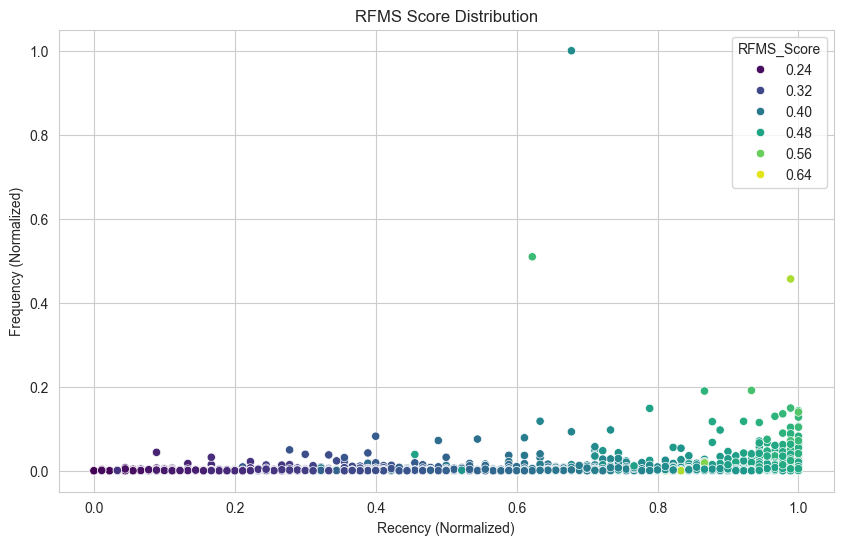

In [6]:
cluster_centers = visualize_rfms(encoded_df)

## RFMS Score 

In [7]:
cluster_centers

array([[0.32887316, 0.0026398 , 0.90398913, 0.04512816],
       [0.8723808 , 0.0097453 , 0.90413423, 0.03747734]])

## Classifiying Customers based on Cluster Centers

##### Cluster Centers: Provides insight into the average RFMS scores for each cluster helps to define high and low risk.

In [8]:
classified_df = apply_segment_based_on_clusters(encoded_df, cluster_centers)
classified_df

,CustomerId,Recency,TransactionCount,TotalTransactionAmount,AverageTransactionAmount,StdTransactionAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,...,M_norm,S_norm,Hour_norm,Day_norm,Month_norm,Year_norm,RFMS_Score,Cluster,Classification,Binary_class
2,0,2075,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,...,0.903541,0.032615,0.339130,0.500000,0.909091,0.000000,0.237061,0,Low-risk,0
3,1,2012,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,...,0.903405,0.002787,0.584980,0.457576,0.694215,0.272727,0.404937,1,High-risk,1
4,2,1998,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,...,0.903541,0.029987,0.623188,0.000000,0.090909,1.000000,0.450354,1,High-risk,1
6,3,2033,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,...,0.903789,0.029755,0.439614,0.900000,1.000000,0.000000,0.353319,0,Low-risk,0
9,4,2052,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,...,0.903541,0.000000,0.565217,0.266667,1.000000,0.000000,0.292613,0,Low-risk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,3016,1991,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,...,0.903541,0.030275,0.434783,0.233333,0.090909,1.000000,0.469871,1,High-risk,1
3719,3017,2012,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,...,0.903541,0.033542,0.652174,0.566667,0.000000,1.000000,0.412293,1,High-risk,1
3720,3018,1987,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,...,0.908052,0.073598,0.604391,0.582508,0.382538,0.623762,0.498747,1,High-risk,1
3721,3019,2054,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,...,0.904565,0.022045,0.629156,0.200000,1.000000,0.000000,0.293742,0,Low-risk,0


 ##  Visualize the clusters using two principal components for simplicity

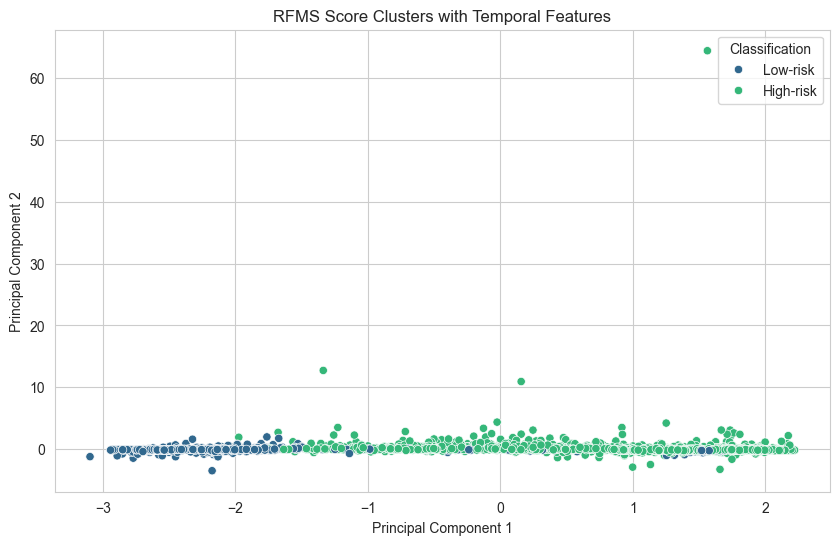

In [9]:
Visualize_clusters(classified_df)

## Perform Weight of Evidence (WoE) binning 

In [10]:
df = classified_df.drop(['Cluster','Classification','PC1','PC2'], axis=1)
df.head()

,CustomerId,Recency,TransactionCount,TotalTransactionAmount,AverageTransactionAmount,StdTransactionAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,R_norm,F_norm,M_norm,S_norm,Hour_norm,Day_norm,Month_norm,Year_norm,RFMS_Score,Binary_class
2,0,2075,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,0.011111,0.000978,0.903541,0.032615,0.339130,0.500000,0.909091,0.000000,0.237061,0
3,1,2012,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,0.711111,0.002445,0.903405,0.002787,0.584980,0.457576,0.694215,0.272727,0.404937,1
4,2,1998,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,0.866667,0.001222,0.903541,0.029987,0.623188,0.000000,0.090909,1.000000,0.450354,1
6,3,2033,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,0.477778,0.001956,0.903789,0.029755,0.439614,0.900000,1.000000,0.000000,0.353319,0
9,4,2052,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,0.266667,0.000244,0.903541,0.000000,0.565217,0.266667,1.000000,0.000000,0.292613,0


In [11]:
binned_df, woe_iv_info = woe_binning(df)

C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [21]:
binned_df

,CustomerId,Recency,TransactionCount,TotalTransactionAmount,AverageTransactionAmount,StdTransactionAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,R_norm,F_norm,M_norm,S_norm,Hour_norm,Day_norm,Month_norm,Year_norm,RFMS_Score,Binary_class
2,0,4,1,2,3,3,0,2,3,0,0,1,2,3,0,2,3,0,0,0
3,0,2,2,0,0,0,3,2,3,0,2,2,0,0,3,2,3,0,1,1
4,0,2,1,2,2,2,3,0,1,2,3,1,2,2,3,0,1,2,2,1
6,0,3,2,3,4,2,1,4,4,0,1,2,3,2,1,4,4,0,1,0
9,0,4,0,2,4,0,2,0,4,0,0,0,2,0,2,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,4,1,1,2,2,2,1,0,1,2,3,1,2,2,1,0,1,2,3,1
3719,4,2,1,2,3,3,3,3,0,2,2,1,2,3,3,3,0,2,2,1
3720,4,0,4,4,4,4,3,3,2,1,4,4,4,4,3,3,2,1,4,1
3721,4,4,3,4,4,2,3,0,4,0,0,3,4,2,3,0,4,0,0,0


In [13]:
(binned_df['Binary_class']== 0).sum()

1008

In [14]:
(binned_df['Binary_class']== 1).sum()

2013

## Information Value Info

In [15]:
woe_iv_info

{'CustomerId': 0.006226265299544404,
 'Recency': 34.16381018795121,
 'TransactionCount': 0.7836583555642628,
 'TotalTransactionAmount': 0.541709103555407,
 'AverageTransactionAmount': 0.13340385705066093,
 'StdTransactionAmount': 0.1628408192682041,
 'AvgTransactionHour': 0.08618686709175746,
 'AvgTransactionDay': 0.4022158836364656,
 'AvgTransactionMonth': 10.467585216130885,
 'AvgTransactionYear': 3.0421214756760153,
 'R_norm': 32.5647269484187,
 'F_norm': 0.7836583555642628,
 'M_norm': 0.541709103555407,
 'S_norm': 0.1628408192682041,
 'Hour_norm': 0.08618686709175746,
 'Day_norm': 0.4022158836364656,
 'Month_norm': 10.467585216130885,
 'Year_norm': 3.0421214756760153,
 'RFMS_Score': 17.148877529123812}

## Feature Selection

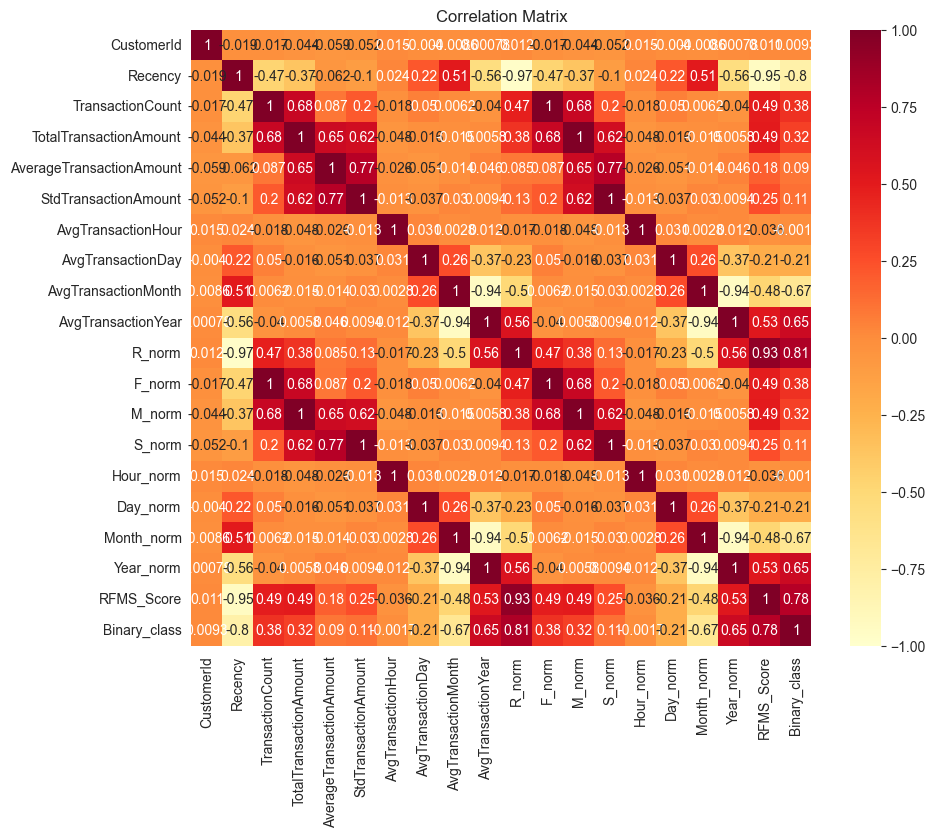

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Compute the correlation matrix
corr_matrix = binned_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [17]:
high_corr_features = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)[corr_matrix.abs().unstack() > 0.8].index.tolist()
high_corr_features

[('CustomerId', 'CustomerId'),
 ('TransactionCount', 'TransactionCount'),
 ('TotalTransactionAmount', 'TotalTransactionAmount'),
 ('TotalTransactionAmount', 'M_norm'),
 ('AverageTransactionAmount', 'AverageTransactionAmount'),
 ('StdTransactionAmount', 'StdTransactionAmount'),
 ('StdTransactionAmount', 'S_norm'),
 ('AvgTransactionHour', 'AvgTransactionHour'),
 ('AvgTransactionHour', 'Hour_norm'),
 ('AvgTransactionDay', 'AvgTransactionDay'),
 ('AvgTransactionDay', 'Day_norm'),
 ('AvgTransactionMonth', 'AvgTransactionMonth'),
 ('AvgTransactionMonth', 'Month_norm'),
 ('AvgTransactionYear', 'AvgTransactionYear'),
 ('AvgTransactionYear', 'Year_norm'),
 ('R_norm', 'R_norm'),
 ('F_norm', 'TransactionCount'),
 ('F_norm', 'F_norm'),
 ('M_norm', 'TotalTransactionAmount'),
 ('M_norm', 'M_norm'),
 ('S_norm', 'StdTransactionAmount'),
 ('S_norm', 'S_norm'),
 ('Hour_norm', 'AvgTransactionHour'),
 ('Hour_norm', 'Hour_norm'),
 ('Day_norm', 'AvgTransactionDay'),
 ('Day_norm', 'Day_norm'),
 ('Month_norm'

## Selecting Features based on Correlation matrix
##### Drop features that has hight correlation with other features

In [18]:
selected_features_df = binned_df.drop(['AvgTransactionDay', 'AvgTransactionMonth','AvgTransactionYear','RFMS_Score','CustomerId'
,'TransactionCount','TotalTransactionAmount','AvgTransactionHour'], axis=1)
selected_features_df 

,Recency,AverageTransactionAmount,StdTransactionAmount,R_norm,F_norm,M_norm,S_norm,Hour_norm,Day_norm,Month_norm,Year_norm,Binary_class
2,4,3,3,0,1,2,3,0,2,3,0,0
3,2,0,0,2,2,0,0,3,2,3,0,1
4,2,2,2,3,1,2,2,3,0,1,2,1
6,3,4,2,1,2,3,2,1,4,4,0,0
9,4,4,0,0,0,2,0,2,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3718,1,2,2,3,1,2,2,1,0,1,2,1
3719,2,3,3,2,1,2,3,3,3,0,2,1
3720,0,4,4,4,4,4,4,3,3,2,1,1
3721,4,4,2,0,3,4,2,3,0,4,0,0


In [19]:
selected_features_df.columns

Index(['Recency', 'AverageTransactionAmount', 'StdTransactionAmount', 'R_norm',
       'F_norm', 'M_norm', 'S_norm', 'Hour_norm', 'Day_norm', 'Month_norm',
       'Year_norm', 'Binary_class'],
      dtype='object')

## Save the the processed dataset

In [20]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(selected_features_df, output_folder, filename)

Dataset saved to ..\data\featured\featured_df.parquet
